# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

Загрузим исходные данные, обучающую и тестовые выборки.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Функция построения гистограммы и боксплот
def stat_plot(data, param, bins=10):
    # Create Fig
    fig = plt.figure(figsize=(15, 6), dpi= 80)
    grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

    # Define the axes
    ax_main = fig.add_subplot(grid[:-1, :-1])
    ax_right = fig.add_subplot(grid[:-1, -1])
    
    # histogram on main ax
    ax_main.hist(data[param], bins, histtype='stepfilled', orientation='vertical')

    # boxplot in the right
    ax_right.boxplot(data[param])
    ax_right.grid(axis='y')

    # Decorations
    ax_main.set(title='Гистограмма и боксплот по параметру '+param)

    plt.show()

In [4]:
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv')
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv')

In [5]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [6]:
gold_recovery_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [7]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [8]:
gold_recovery_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [9]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [10]:
gold_recovery_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


#### Исходный датасет и обучающая выборка содержат данные в 87 столбцах. Исходный датасет содержит 22715 строк, обучающая выборка 16859. Тестовая выборка содержит 53 столбца и 5855 строки. Соотношение обучающей и тестовой выборок 75:25. Все признаки количественные, категориальные признаки отсутствуют. Также в выборках присутствуют null-значения.  
#### Для корректного построения моделей необходимо проверить данные на наличие выбросов, заполнить или удалить null-значения, стандартизировать признаки.

#### Тестовая выборка содержит меньшее количество фичей. Отсутствующие столбцы являются результатами обработки входного материала, соответственно их значения не могут быть известны заранее. Исспользование данных столбцов в обучении модели возможно приведет к переобучению.

### Предобработка данных

Обработаем null-значения датасета **gold_recovery_train** для всех столбцов, кроме содержащих входные и расчетные параметры. Для обучения модели они использоваться не будут, поэтому наличие null-значений в них допустимо.

Проверим наличие пустых значений для столбцов **primary_cleaner.input....**

Рассчитаем количество пустых значений

In [11]:
gold_recovery_train.loc[:, 'primary_cleaner.input.sulfate':'primary_cleaner.input.xanthate'].isnull().sum()

primary_cleaner.input.sulfate       1307
primary_cleaner.input.depressant    1262
primary_cleaner.input.feed_size        0
primary_cleaner.input.xanthate       985
dtype: int64

Всего пустых записей по столбцу **primary_cleaner.input.sulfate** 1307, что составляет около 8% от всех записей.  
Посмотрим какое распределение имеет параметр и его описание.

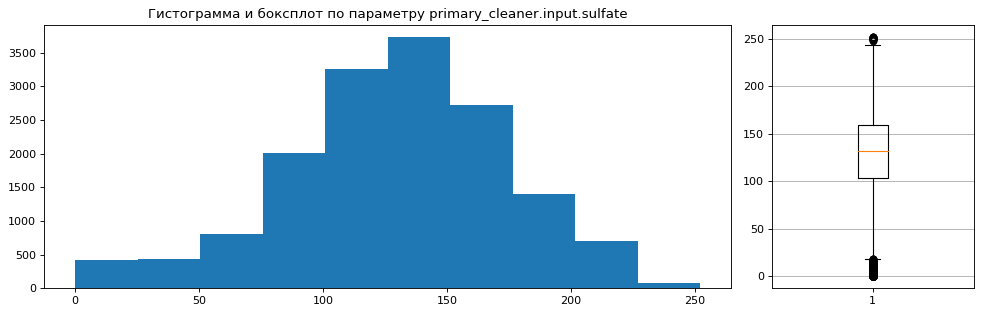

In [12]:
stat_plot(gold_recovery_train.loc[gold_recovery_train['primary_cleaner.input.sulfate'].notnull()], 'primary_cleaner.input.sulfate')

In [13]:
gold_recovery_train['primary_cleaner.input.sulfate'].describe()

count    15553.000000
mean       129.479789
std         45.386931
min          0.000003
25%        103.064021
50%        131.783108
75%        159.539839
max        251.999948
Name: primary_cleaner.input.sulfate, dtype: float64

Так как параметр распределен нормально, среднее и медиана практически равны, т.е. значительные выбросы отсустсвуют, заполним null-значения средним значением.

In [14]:
gold_recovery_train.loc[gold_recovery_train['primary_cleaner.input.sulfate'].isnull(), 'primary_cleaner.input.sulfate'] = gold_recovery_train['primary_cleaner.input.sulfate'].mean()

Проверим корректность заполнения null-значений

In [15]:
gold_recovery_train.loc[:, 'primary_cleaner.input.sulfate':'primary_cleaner.input.xanthate'].isnull().sum()

primary_cleaner.input.sulfate          0
primary_cleaner.input.depressant    1262
primary_cleaner.input.feed_size        0
primary_cleaner.input.xanthate       985
dtype: int64

Всего пустых записей по столбцу **primary_cleaner.input.depressant** 1262, что составляет около 7.5% от всех записей.  
Посмотрим какое распределение имеет параметр и его описание.

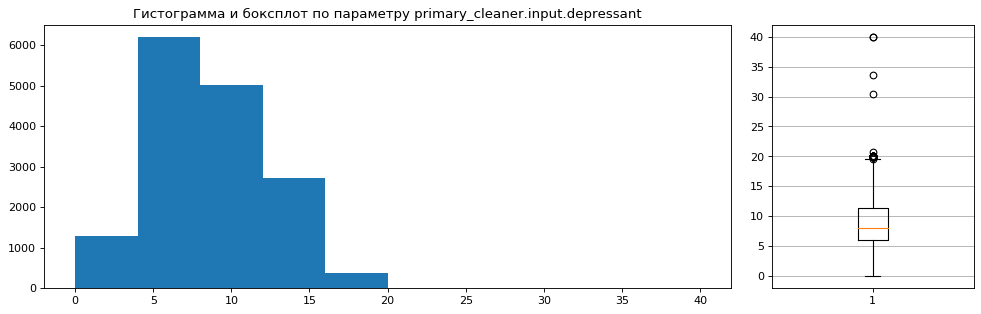

In [16]:
stat_plot(gold_recovery_train.loc[gold_recovery_train['primary_cleaner.input.depressant'].notnull()], 'primary_cleaner.input.depressant')

In [17]:
gold_recovery_train['primary_cleaner.input.depressant'].describe()

count    15598.000000
mean         8.625021
std          3.698633
min          0.000000
25%          6.004886
50%          8.016531
75%         11.437819
max         40.000000
Name: primary_cleaner.input.depressant, dtype: float64

Распределение параметра имеет вид распределения Пуассона, среднее и медиана равны практически равны, заполним null-значения средним значением.

In [18]:
gold_recovery_train.loc[gold_recovery_train['primary_cleaner.input.depressant'].isnull(), 'primary_cleaner.input.depressant'] = gold_recovery_train['primary_cleaner.input.depressant'].mean()

Проверим корректность заполнения null-значений

In [19]:
gold_recovery_train.loc[:, 'primary_cleaner.input.sulfate':'primary_cleaner.input.xanthate'].isnull().sum()

primary_cleaner.input.sulfate         0
primary_cleaner.input.depressant      0
primary_cleaner.input.feed_size       0
primary_cleaner.input.xanthate      985
dtype: int64

Всего пустых записей по столбцу **primary_cleaner.input.xanthate** 985, что составляет около 6% от всех записей.  
Посмотрим какое распределение имеет параметр и его описание.

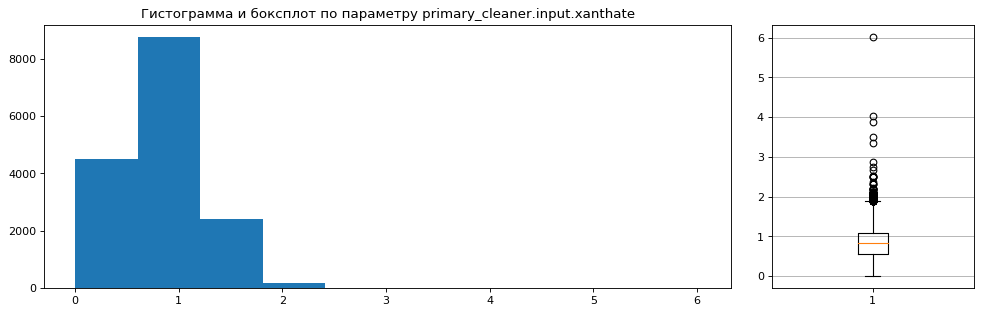

In [20]:
stat_plot(gold_recovery_train.loc[gold_recovery_train['primary_cleaner.input.xanthate'].notnull()], 'primary_cleaner.input.xanthate')

In [21]:
gold_recovery_train['primary_cleaner.input.xanthate'].describe()

count    15875.000000
mean         0.843812
std          0.419098
min          0.000005
25%          0.568934
50%          0.844271
75%          1.097080
max          6.027907
Name: primary_cleaner.input.xanthate, dtype: float64

Распределение параметра имеет вид распределения Пуассона, среднее и медиана равны практически равны, заполним null-значения средним значением.

In [22]:
gold_recovery_train.loc[gold_recovery_train['primary_cleaner.input.xanthate'].isnull(), 'primary_cleaner.input.xanthate'] = gold_recovery_train['primary_cleaner.input.xanthate'].mean()

Проверим корректность заполнения null-значений

In [23]:
gold_recovery_train.loc[:, 'primary_cleaner.input.sulfate':'primary_cleaner.input.xanthate'].isnull().sum()

primary_cleaner.input.sulfate       0
primary_cleaner.input.depressant    0
primary_cleaner.input.feed_size     0
primary_cleaner.input.xanthate      0
dtype: int64

Проверим наличие пустых значений для столбцов **primary_cleaner.state....**

In [24]:
gold_recovery_train.loc[:, 'primary_cleaner.state.floatbank8_a_air':'primary_cleaner.state.floatbank8_d_level'].isnull().sum()

primary_cleaner.state.floatbank8_a_air      40
primary_cleaner.state.floatbank8_a_level    33
primary_cleaner.state.floatbank8_b_air      40
primary_cleaner.state.floatbank8_b_level    27
primary_cleaner.state.floatbank8_c_air      38
primary_cleaner.state.floatbank8_c_level    27
primary_cleaner.state.floatbank8_d_air      39
primary_cleaner.state.floatbank8_d_level    27
dtype: int64

В столбцах блока **primary_cleaner.state....** содержится менее 2% пустых записей. Удалим их.

In [25]:
for i in ['primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level',
          'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 
          'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level',
          'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level']:
    gold_recovery_train = gold_recovery_train.loc[gold_recovery_train[i].notnull()]

Проверим корректность удаления пустых строк

In [26]:
gold_recovery_train.loc[:, 'primary_cleaner.state.floatbank8_a_air':'primary_cleaner.state.floatbank8_d_level'].isnull().sum()

primary_cleaner.state.floatbank8_a_air      0
primary_cleaner.state.floatbank8_a_level    0
primary_cleaner.state.floatbank8_b_air      0
primary_cleaner.state.floatbank8_b_level    0
primary_cleaner.state.floatbank8_c_air      0
primary_cleaner.state.floatbank8_c_level    0
primary_cleaner.state.floatbank8_d_air      0
primary_cleaner.state.floatbank8_d_level    0
dtype: int64

Проверим наличие пустых значений для столбцов **rougher.input.feed_...**

In [27]:
gold_recovery_train.loc[:, 'rougher.input.feed_ag':'rougher.input.feed_au'].isnull().sum()

rougher.input.feed_ag       57
rougher.input.feed_pb      203
rougher.input.feed_rate    479
rougher.input.feed_size    385
rougher.input.feed_sol     267
rougher.input.feed_au       58
dtype: int64

Пустых значений в столбцах **rougher.input.feed_...** менее 3% пустых записей. Удалим их.

In [28]:
for i in ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 
          'rougher.input.feed_sol', 'rougher.input.feed_au']:
    gold_recovery_train = gold_recovery_train.loc[gold_recovery_train[i].notnull()]

Проверим корректность удаления пустых строк

In [29]:
gold_recovery_train.loc[:, 'rougher.input.feed_ag':'rougher.input.feed_au'].isnull().sum()

rougher.input.feed_ag      0
rougher.input.feed_pb      0
rougher.input.feed_rate    0
rougher.input.feed_size    0
rougher.input.feed_sol     0
rougher.input.feed_au      0
dtype: int64

Проверим наличие пустых значений для столбцов **rougher.input.floatbank1...**

In [30]:
gold_recovery_train.loc[:, 'rougher.input.floatbank10_sulfate':'rougher.input.floatbank11_xanthate'].isnull().sum()

rougher.input.floatbank10_sulfate      542
rougher.input.floatbank10_xanthate     171
rougher.input.floatbank11_sulfate      336
rougher.input.floatbank11_xanthate    1193
dtype: int64

В столбцах блока **rougher.input.floatbank10_xanthate** и **rougher.input.floatbank11_sulfate** содержится менее 2% пустых записей. Удалим их.

In [31]:
gold_recovery_train = gold_recovery_train.loc[gold_recovery_train['rougher.input.floatbank10_xanthate'].notnull()]

In [32]:
gold_recovery_train = gold_recovery_train.loc[gold_recovery_train['rougher.input.floatbank11_sulfate'].notnull()]

Всего пустых записей по столбцу **rougher.input.floatbank10_sulfate** 542, что составляет 3.5% от всех записей.  
Посмотрим какое распределение имеет параметр и его описание.

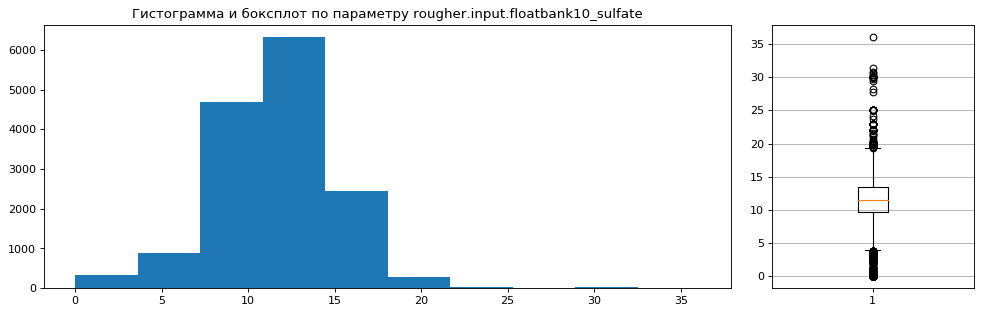

In [33]:
stat_plot(gold_recovery_train.loc[gold_recovery_train['rougher.input.floatbank10_sulfate'].notnull()], 'rougher.input.floatbank10_sulfate')

In [34]:
gold_recovery_train['rougher.input.floatbank10_sulfate'].describe()

count    15032.000000
mean        11.531233
std          3.553172
min          0.000004
25%          9.648712
50%         11.503567
75%         13.499525
max         36.118275
Name: rougher.input.floatbank10_sulfate, dtype: float64

Так как параметр распределен нормально, среднее и медиана практически равны, т.е. значительные выбросы отсустсвуют, заполним null-значения средним значением.

In [35]:
gold_recovery_train.loc[gold_recovery_train['rougher.input.floatbank10_sulfate'].isnull(), 'rougher.input.floatbank10_sulfate'] = gold_recovery_train['rougher.input.floatbank10_sulfate'].mean()

Всего пустых записей по столбцу **rougher.input.floatbank11_xanthate** 1193, что составляет около 7.5% от всех записей.  
Посмотрим какое распределение имеет параметр и его описание.

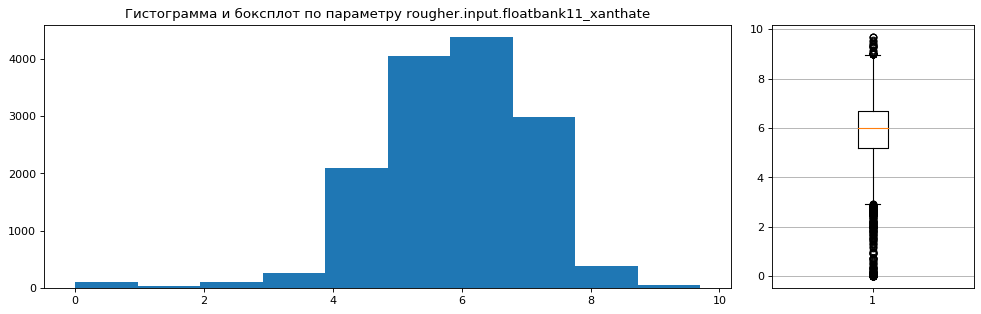

In [36]:
stat_plot(gold_recovery_train.loc[gold_recovery_train['rougher.input.floatbank11_xanthate'].notnull()], 'rougher.input.floatbank11_xanthate')

In [37]:
gold_recovery_train['rougher.input.floatbank11_xanthate'].describe()

count    14454.000000
mean         5.859656
std          1.198618
min          0.000024
25%          5.186226
50%          5.998691
75%          6.699714
max          9.698407
Name: rougher.input.floatbank11_xanthate, dtype: float64

Так как параметр распределен нормально, среднее и медиана практически равны, т.е. значительные выбросы отсустсвуют, заполним null-значения средним значением.

In [38]:
gold_recovery_train.loc[gold_recovery_train['rougher.input.floatbank11_xanthate'].isnull(), 'rougher.input.floatbank11_xanthate'] = gold_recovery_train['rougher.input.floatbank11_xanthate'].mean()

Проверим корректность удаления пустых строк

In [39]:
gold_recovery_train.loc[:, 'rougher.input.floatbank10_sulfate':'rougher.input.floatbank11_xanthate'].isnull().sum()

rougher.input.floatbank10_sulfate     0
rougher.input.floatbank10_xanthate    0
rougher.input.floatbank11_sulfate     0
rougher.input.floatbank11_xanthate    0
dtype: int64

Проверим наличие пустых значений для столбцов **rougher.state.floatbank10_a_...**

In [40]:
gold_recovery_train.loc[:, 'rougher.state.floatbank10_a_air':'rougher.state.floatbank10_f_level'].isnull().sum()

rougher.state.floatbank10_a_air        0
rougher.state.floatbank10_a_level      0
rougher.state.floatbank10_b_air        0
rougher.state.floatbank10_b_level      0
rougher.state.floatbank10_c_air        0
rougher.state.floatbank10_c_level      0
rougher.state.floatbank10_d_air        4
rougher.state.floatbank10_d_level      4
rougher.state.floatbank10_e_air      502
rougher.state.floatbank10_e_level      4
rougher.state.floatbank10_f_air        4
rougher.state.floatbank10_f_level      4
dtype: int64

В столбцах **rougher.state.floatbank10_d_air**, **rougher.state.floatbank10_d_level**, **rougher.state.floatbank10_e_level**, **rougher.state.floatbank10_f_air** и **rougher.state.floatbank10_f_level** по 4 пустых записи. Удалим их.

In [41]:
gold_recovery_train = gold_recovery_train.loc[gold_recovery_train['rougher.state.floatbank10_d_air'].notnull()]

Всего пустых записей по столбцу **rougher.state.floatbank10_e_air** 502, что составляет 3% от всех записей.  
Посмотрим какое распределение имеет параметр и его описание.

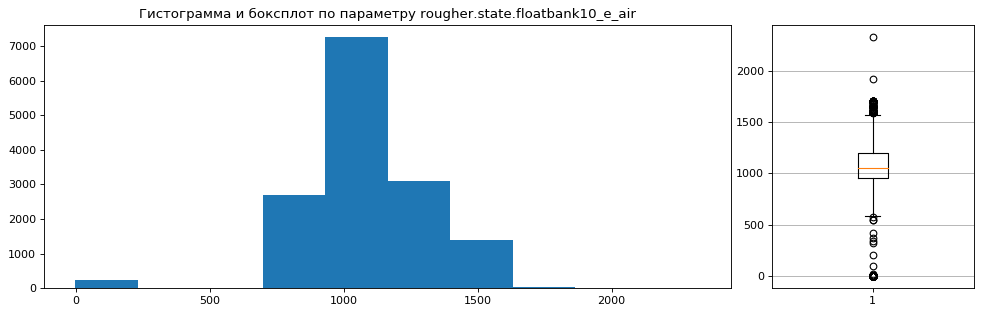

In [42]:
stat_plot(gold_recovery_train.loc[gold_recovery_train['rougher.state.floatbank10_e_air'].notnull()], 'rougher.state.floatbank10_e_air')

In [43]:
gold_recovery_train['rougher.state.floatbank10_e_air'].describe()

count    14751.000000
mean      1067.645619
std        231.225051
min         -2.163619
25%        950.579483
50%       1049.882845
75%       1199.864585
max       2330.310425
Name: rougher.state.floatbank10_e_air, dtype: float64

Так как параметр распределен нормально, среднее и медиана практически равны, т.е. значительные выбросы отсустсвуют, заполним null-значения средним значением.

In [44]:
gold_recovery_train.loc[gold_recovery_train['rougher.state.floatbank10_e_air'].isnull(), 'rougher.state.floatbank10_e_air'] = gold_recovery_train['rougher.state.floatbank10_e_air'].mean()

Остальные столбцы не содержат пустых значений.

Проверим корректность удаления пустых строк

In [45]:
gold_recovery_train.loc[:, 'rougher.state.floatbank10_a_air':'rougher.state.floatbank10_f_level'].isnull().sum()

rougher.state.floatbank10_a_air      0
rougher.state.floatbank10_a_level    0
rougher.state.floatbank10_b_air      0
rougher.state.floatbank10_b_level    0
rougher.state.floatbank10_c_air      0
rougher.state.floatbank10_c_level    0
rougher.state.floatbank10_d_air      0
rougher.state.floatbank10_d_level    0
rougher.state.floatbank10_e_air      0
rougher.state.floatbank10_e_level    0
rougher.state.floatbank10_f_air      0
rougher.state.floatbank10_f_level    0
dtype: int64

Проверим наличие пустых значений для столбцов **secondary_cleaner.state.floatbank...**

In [46]:
gold_recovery_train.loc[:, 'secondary_cleaner.state.floatbank2_a_air':'secondary_cleaner.state.floatbank6_a_level'].isnull().sum().sum()

488

В столбцах **secondary_cleaner.state.floatbank...** суммарно содержится около 3% пустых записей. Удалим их.

In [47]:
for i in ['secondary_cleaner.state.floatbank2_a_air', 'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank2_b_air',
          'secondary_cleaner.state.floatbank2_b_level', 'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level']:
    gold_recovery_train = gold_recovery_train.loc[gold_recovery_train[i].notnull()]

Проверим корректность удаления пустых строк

In [48]:
gold_recovery_train.loc[:, 'secondary_cleaner.state.floatbank2_a_air':'secondary_cleaner.state.floatbank6_a_level'].isnull().sum().sum()

0

Для всех столбцов **gold_recovery_train**, содержащих входные параметры сырья и параметры, характеризующие текущее состояние этапа, null-значения заполнены.

Обработаем null-значения датасета **gold_recovery_test** для всех столбцов. Так как для обучения модели необходим датасет без null-значений, удалим все строки с пустыми значениями, так как восстановить их нет возможности. Оставшегося датасета будет достаточно для тестирования модели.

In [49]:
for i in ['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.xanthate',
          'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 
          'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level',
          'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level',
          'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 
          'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 
          'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 
          'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate',
          'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 
          'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 
          'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 
          'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 
          'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 
          'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 
          'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level',
          'secondary_cleaner.state.floatbank2_a_air', 'secondary_cleaner.state.floatbank2_a_level',
          'secondary_cleaner.state.floatbank2_b_air', 'secondary_cleaner.state.floatbank2_b_level',
          'secondary_cleaner.state.floatbank3_a_air', 'secondary_cleaner.state.floatbank3_a_level',
          'secondary_cleaner.state.floatbank3_b_air', 'secondary_cleaner.state.floatbank3_b_level',
          'secondary_cleaner.state.floatbank4_a_air', 'secondary_cleaner.state.floatbank4_a_level',
          'secondary_cleaner.state.floatbank4_b_air', 'secondary_cleaner.state.floatbank4_b_level',
          'secondary_cleaner.state.floatbank5_a_air', 'secondary_cleaner.state.floatbank5_a_level',
          'secondary_cleaner.state.floatbank5_b_air', 'secondary_cleaner.state.floatbank5_b_level',
          'secondary_cleaner.state.floatbank6_a_air', 'secondary_cleaner.state.floatbank6_a_level']:
    gold_recovery_test = gold_recovery_test.loc[gold_recovery_test[i].notnull()]

In [50]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5383 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5383 non-null object
primary_cleaner.input.sulfate                 5383 non-null float64
primary_cleaner.input.depressant              5383 non-null float64
primary_cleaner.input.feed_size               5383 non-null float64
primary_cleaner.input.xanthate                5383 non-null float64
primary_cleaner.state.floatbank8_a_air        5383 non-null float64
primary_cleaner.state.floatbank8_a_level      5383 non-null float64
primary_cleaner.state.floatbank8_b_air        5383 non-null float64
primary_cleaner.state.floatbank8_b_level      5383 non-null float64
primary_cleaner.state.floatbank8_c_air        5383 non-null float64
primary_cleaner.state.floatbank8_c_level      5383 non-null float64
primary_cleaner.state.floatbank8_d_air        5383 non-null float64
primary_cleaner.state.floatbank8_d_level      5383 non-null float64
rougher.in

### Расчет эффективности обогащения

Формула расчета эффективности обогащения:
\begin{equation}
Recovery =  \frac{C\times(F-T)}{F\times(C-T)}\times100\% \\
\qquad
где: \\
\qquad C — доля \ золота \ в \ концентрате \ после \ флотации/очистки; \\
\qquad F — доля \ золота \ в \ сырье/концентрате \ до \ флотации/очистки; \\
\qquad T — доля \ золота \ в \ отвальных \ хвостах \ после \ флотации/очистки. \\
\end{equation}

Параметр **F** содержится в столбце **rougher.input.feed_au**  
Параметр **C** содержится в столбце **rougher.output.concentrate_au**  
Параметр **T** содержится в столбце **rougher.output.tail_au**

Рассчитаем параметр **recovery**

In [51]:
gold_recovery_train['recovery'] = ((gold_recovery_train['rougher.output.concentrate_au']*(
            gold_recovery_train['rougher.input.feed_au'] - gold_recovery_train['rougher.output.tail_au'])) / (
            (gold_recovery_train['rougher.input.feed_au']*(
            gold_recovery_train['rougher.output.concentrate_au'] - gold_recovery_train['rougher.output.tail_au'])))) * 100

Проверим наличие null-значений

In [52]:
gold_recovery_train.loc[:, ['rougher.output.recovery', 'recovery']].isnull().sum()

rougher.output.recovery    1284
recovery                   1028
dtype: int64

Для расчета MAE исключим из датасета null-значения

In [53]:
from sklearn.metrics import mean_absolute_error

In [54]:
gold_recovery_train_recovery = gold_recovery_train.loc[(gold_recovery_train['rougher.output.recovery'].notnull() & gold_recovery_train['recovery'].notnull()), ['rougher.output.recovery','recovery']]

In [55]:
gold_recovery_train_recovery.isnull().sum()

rougher.output.recovery    0
recovery                   0
dtype: int64

In [56]:
mean_absolute_error(gold_recovery_train_recovery['rougher.output.recovery'], gold_recovery_train_recovery['recovery'])

9.495612004952074e-15

#### Полученное значение MAE очень маленькое, что говорит об отсутствии различий между рассчитанным значением recovery и признаком rougher.output.recovery в датасете.  
#### Признак rougher.output.recovery может быть использован для дальнейших расчетов. Формулу расчета эффективности можно исспользовать для заполнения null-значений целевых признаков.

Проверим наличие null-значений в столбцах **rougher.output.recovery** и **final.output.recovery**

In [57]:
gold_recovery_train.loc[:, ['rougher.output.recovery', 'final.output.recovery', 'recovery']].isnull().sum()

rougher.output.recovery    1284
final.output.recovery       598
recovery                   1028
dtype: int64

Заполним null-значения **rougher.output.recovery** рассчитанными значениями **recovery**, где они есть. Остальные удалим, так как восстановить их нет возможности.

In [58]:
gold_recovery_train.loc[(gold_recovery_train['rougher.output.recovery'].isnull()) & gold_recovery_train['recovery'].notnull(), 'rougher.output.recovery'] = gold_recovery_train.loc[(gold_recovery_train['rougher.output.recovery'].isnull()) & gold_recovery_train['recovery'].notnull(), 'recovery'] 

In [59]:
gold_recovery_train = gold_recovery_train.loc[gold_recovery_train['rougher.output.recovery'].notnull()]

Рассчитаем значение для оставшихся пустых записей **final.output.recovery** по приведенной выше формуле эффективности.  

In [60]:
gold_recovery_train.loc[:, ['rougher.output.recovery', 'final.output.recovery', 'recovery']].isnull().sum()

rougher.output.recovery      0
final.output.recovery      138
recovery                     0
dtype: int64

In [61]:
gold_recovery_train.loc[gold_recovery_train['final.output.recovery'].isnull(), 'final.output.recovery'] = ((gold_recovery_train['final.output.concentrate_au']*(
            gold_recovery_train['rougher.output.concentrate_au'] - gold_recovery_train['final.output.tail_au'])) / (
            (gold_recovery_train['rougher.output.concentrate_au']*(
            gold_recovery_train['final.output.concentrate_au'] - gold_recovery_train['final.output.tail_au'])))) * 100

In [62]:
gold_recovery_train = gold_recovery_train.loc[gold_recovery_train['final.output.recovery'].notnull()]

In [63]:
gold_recovery_train.loc[:, ['rougher.output.recovery', 'final.output.recovery', 'recovery']].isnull().sum()

rougher.output.recovery    0
final.output.recovery      0
recovery                   0
dtype: int64

В ходе расчета метрик **rougher.output.recovery** и **final.output.recovery** могли возникнуть значения типа -inf и inf. Проверим датасеты на их отсутствие.

In [64]:
gold_recovery_train.loc[gold_recovery_train['rougher.output.recovery'] == float('-inf'), 'rougher.output.recovery'].count()

21

In [65]:
gold_recovery_train.loc[gold_recovery_train['rougher.output.recovery'] == float('inf'), 'rougher.output.recovery'].count()

1

Удалим строки с inf из датасета

In [66]:
gold_recovery_train = gold_recovery_train.drop(gold_recovery_train.loc[gold_recovery_train['rougher.output.recovery'] == float('inf')].index, axis=0)

In [67]:
gold_recovery_train = gold_recovery_train.drop(gold_recovery_train.loc[gold_recovery_train['rougher.output.recovery'] == float('-inf')].index, axis=0)

In [68]:
gold_recovery_train.loc[gold_recovery_train['final.output.recovery'] == float('-inf'), 'rougher.output.recovery'].count()

2

In [69]:
gold_recovery_train.loc[gold_recovery_train['final.output.recovery'] == float('inf'), 'rougher.output.recovery'].count()

1

In [70]:
gold_recovery_train = gold_recovery_train.drop(gold_recovery_train.loc[gold_recovery_train['final.output.recovery'] == float('inf')].index, axis=0)

In [71]:
gold_recovery_train = gold_recovery_train.drop(gold_recovery_train.loc[gold_recovery_train['final.output.recovery'] == float('-inf')].index, axis=0)

# 2. Анализ данных

### Анализ изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Данные о концентрации металлов на различных этапах содержатся в признаках:
* до флотации:
        rougher.input.feed_ag
        rougher.input.feed_pb
        rougher.input.feed_au
* после флотации (черновой концентрат):
        rougher.output.concentrate_ag
        rougher.output.concentrate_pb
        rougher.output.concentrate_au
* после первого этапа очистки:
        primary_cleaner.output.concentrate_ag
        primary_cleaner.output.concentrate_pb
        primary_cleaner.output.concentrate_au
* после второго этапа очистки (финальный концентрат):
        final.output.concentrate_ag
        final.output.concentrate_pb
        final.output.concentrate_au

In [72]:
gold_recovery_train_ag = gold_recovery_train.loc[:, ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
gold_recovery_train_pb = gold_recovery_train.loc[:, ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]
gold_recovery_train_au = gold_recovery_train.loc[:, ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]

In [73]:
gold_recovery_train_tail_ag = gold_recovery_train.loc[:, ['rougher.output.tail_ag', 'primary_cleaner.output.tail_ag', 'final.output.tail_ag']]
gold_recovery_train_tail_pb = gold_recovery_train.loc[:, ['rougher.output.tail_pb', 'primary_cleaner.output.tail_pb', 'final.output.tail_pb']]
gold_recovery_train_tail_au = gold_recovery_train.loc[:, ['rougher.output.tail_au', 'primary_cleaner.output.tail_au', 'final.output.tail_au']]

Для анализа изменения концентрации металлов на разный этапах очистки, вычислим среднее значение содержания металла в концентрате по каждому этапу.

In [74]:
gold_recovery_train_ag_mean = gold_recovery_train_ag.mean()
gold_recovery_train_pb_mean = gold_recovery_train_pb.mean()
gold_recovery_train_au_mean = gold_recovery_train_au.mean()

In [75]:
gold_recovery_train_tail_ag_mean = gold_recovery_train_tail_ag.mean()
gold_recovery_train_tail_pb_mean = gold_recovery_train_tail_pb.mean()
gold_recovery_train_tail_au_mean = gold_recovery_train_tail_au.mean()

In [76]:
gold_recovery_train_mean = [[], [], [], []]
for i in [gold_recovery_train_ag_mean, gold_recovery_train_pb_mean, gold_recovery_train_au_mean]:
    gold_recovery_train_mean[0].append(i[0])
    gold_recovery_train_mean[1].append(i[1])
    gold_recovery_train_mean[2].append(i[2])
    gold_recovery_train_mean[3].append(i[3])

In [77]:
gold_recovery_train_tail_mean = [[],[],[]]
for i in [gold_recovery_train_tail_ag_mean, gold_recovery_train_tail_pb_mean, gold_recovery_train_tail_au_mean]:
    gold_recovery_train_tail_mean[0].append(i[0])
    gold_recovery_train_tail_mean[1].append(i[1])
    gold_recovery_train_tail_mean[2].append(i[2])

In [78]:
gold_recovery_train_mean = pd.DataFrame(gold_recovery_train_mean, index=['rougher_input_feed', 'rougher_output_concentrate',
                                                'primary_cleaner_output_concentrate', 'final_output_concentrate'], 
                                       columns=['ag', 'pb', 'au'])

In [79]:
gold_recovery_train_tail_mean = pd.DataFrame(gold_recovery_train_tail_mean, index=['rougher_output_tail', 'primary_cleaner_output_tail',
                                                'final_output_tail'], 
                                       columns=['ag', 'pb', 'au'])

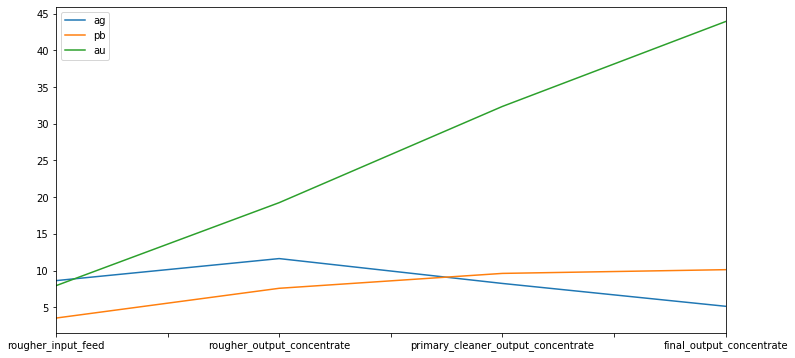

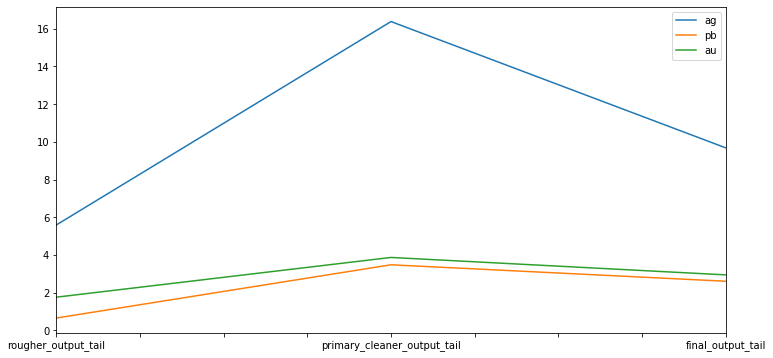

In [80]:
gold_recovery_train_mean.plot(figsize=(12, 6))
gold_recovery_train_tail_mean.plot(figsize=(12, 6))

#### Изменение концентрации золота и платины имеют одинаковый характер, в сырье подающемся на этап флотации концентрация металлов минимальна, после второго этапа очистки концентрация золота и платины самая высокая. Это означает, что во время очистки металлов от примесей, значительная доля золота и платины остается в концентрате. В то время как для серебра концентрация металла после второй очистки минимальна, и большая часть металла остается в отвальных хвостах. Такой характер поведения может объясняться тем, что серебро в два раза легче, чем платина и золото, соответственно легче вымывается из породы.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

Построим графики распределение размеров гранул сырья 

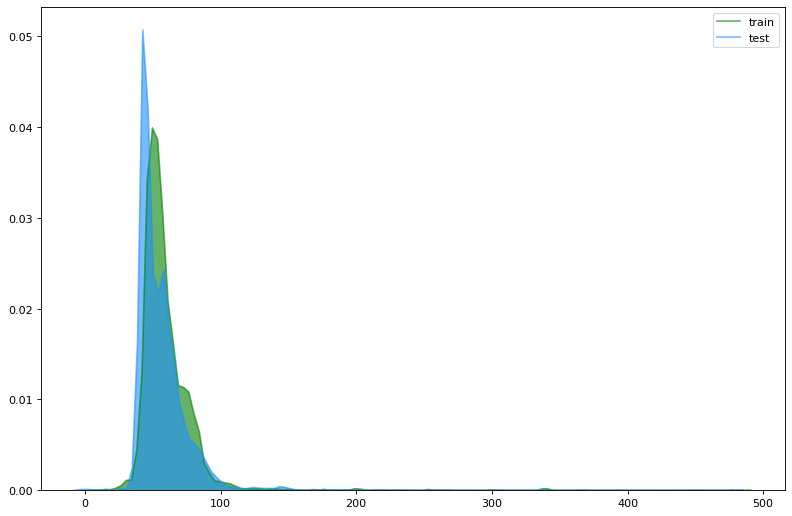

In [81]:
# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
sns.kdeplot(gold_recovery_train['rougher.input.feed_size'], shade=True, color="g", label="train", alpha=.6)
sns.kdeplot(gold_recovery_test['rougher.input.feed_size'], shade=True, color="dodgerblue", label="test", alpha=.6)

# Decoration
plt.legend()
plt.show()

#### Размеры гранул сырья имеют нормальные распределения как для обучающей, так и для тестовой выборк. Выборки могут быть использованы  для оценки модели.

### Исследование суммарной концентрации всех веществ на разных стадиях

Для данного исследования возьмем полный датасет и вычислим суммарную концентрацию веществ на стадиях: в сырье, в черновом и финальном концентратах.

Суммарная концентрация веществ в сырье

In [82]:
gold_recovery_full['rougher.input.feed'] = (gold_recovery_full['rougher.input.feed_ag'] + 
                                           gold_recovery_full['rougher.input.feed_pb'] + 
                                           gold_recovery_full['rougher.input.feed_au'] +
                                           gold_recovery_full['rougher.input.feed_sol'])

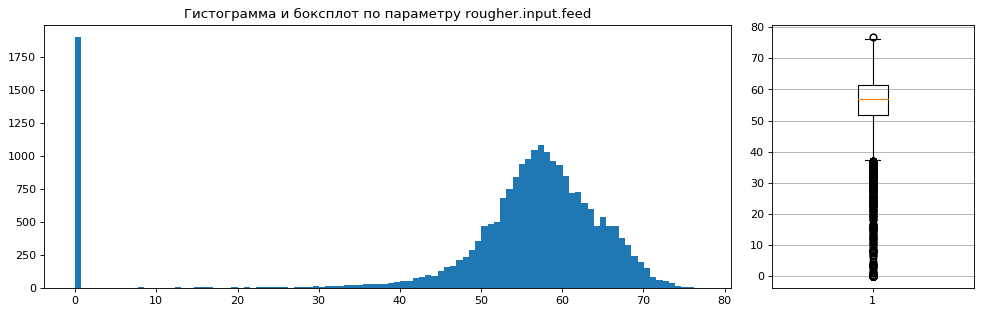

In [83]:
stat_plot(gold_recovery_full.loc[gold_recovery_full['rougher.input.feed'].notnull()], 'rougher.input.feed', 100)

In [84]:
gold_recovery_full['rougher.input.feed'].describe()

count    22241.000000
mean        52.273449
std         17.653233
min          0.000000
25%         51.784664
50%         56.939323
75%         61.519755
max         76.978947
Name: rougher.input.feed, dtype: float64

In [85]:
gold_recovery_full.loc[((gold_recovery_full['rougher.input.feed'] <= 0.1)), 'date'].count()

1893

Суммарная концентрация веществ в черновом концентрате

In [86]:
gold_recovery_full['rougher.output.concentrate'] = (gold_recovery_full['rougher.output.concentrate_ag'] + 
                                           gold_recovery_full['rougher.output.concentrate_pb'] + 
                                           gold_recovery_full['rougher.output.concentrate_au'] +
                                           gold_recovery_full['rougher.output.concentrate_sol'])

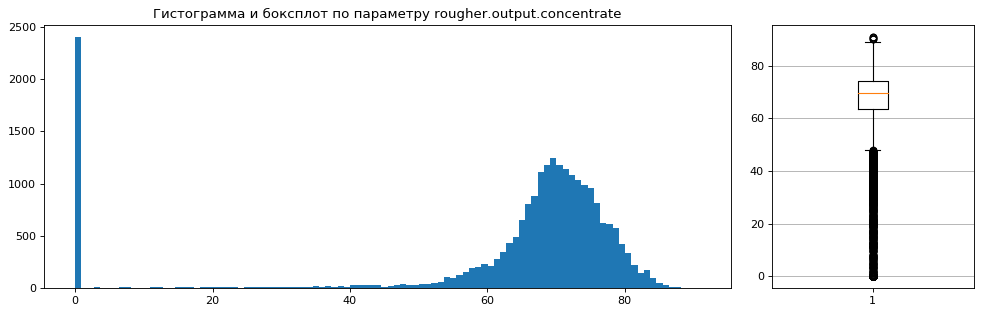

In [87]:
stat_plot(gold_recovery_full.loc[gold_recovery_full['rougher.output.concentrate'].notnull()], 'rougher.output.concentrate', 100)

In [88]:
gold_recovery_full['rougher.output.concentrate'].describe()

count    22526.000000
mean        61.799418
std         23.168341
min          0.000000
25%         63.558831
50%         69.459530
75%         74.058219
max         90.964431
Name: rougher.output.concentrate, dtype: float64

In [89]:
gold_recovery_full.loc[((gold_recovery_full['rougher.output.concentrate'] <= 0.1)), 'date'].count()

2394

Суммарная концентрация веществ в финальном концентрате

In [90]:
gold_recovery_full['final.output.concentrate'] = (gold_recovery_full['final.output.concentrate_ag'] + 
                                           gold_recovery_full['final.output.concentrate_pb'] + 
                                           gold_recovery_full['final.output.concentrate_au'] +
                                           gold_recovery_full['final.output.concentrate_sol'])

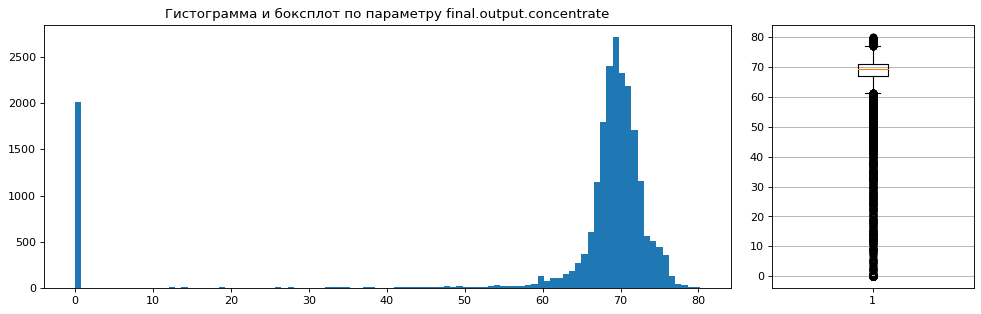

In [91]:
stat_plot(gold_recovery_full.loc[gold_recovery_full['final.output.concentrate'].notnull()], 'final.output.concentrate', 100)

In [92]:
gold_recovery_full['final.output.concentrate'].describe()

count    22328.000000
mean        62.475148
std         20.744652
min          0.000000
25%         67.200835
50%         69.294183
75%         71.165495
max         80.210644
Name: final.output.concentrate, dtype: float64

In [93]:
gold_recovery_full.loc[((gold_recovery_full['final.output.concentrate'] <= 0.1)), 'date'].count()

2012

На всех этапах выделяется большое количество объектов на отрезке от 0 до 0.1. Рассчитаем количество объектов, для которых на всех этапах суммарная концентрация веществ равно 0.

In [94]:
gold_recovery_full.loc[((gold_recovery_full['final.output.concentrate'] == 0) & (gold_recovery_full['rougher.input.feed'] == 0) & (gold_recovery_full['rougher.output.concentrate'] == 0)), ['date', 'final.output.recovery', 'rougher.output.recovery', 'rougher.input.feed', 'rougher.output.concentrate', 'final.output.concentrate']].count()

date                          1312
final.output.recovery            0
rougher.output.recovery          0
rougher.input.feed            1312
rougher.output.concentrate    1312
final.output.concentrate      1312
dtype: int64

#### На всех этапах для концентарции веществ наблюдается большое количество выбросов, а также объектов, для которых на всех этапах суммарная концентрация веществ равна 0. Необходимо оценить объем данных выходящих за диапазон полутора межквартильных расстояний.

In [95]:
def stat(data, param):
    percent_25 = data[param].describe()['25%']
    percent_75 = data[param].describe()['75%']
    inter_quartile_distances = (percent_75 - percent_25)*1.5
    down = percent_25 - inter_quartile_distances
    up = percent_75 + inter_quartile_distances
    count_down = data.loc[(data[param] < down), 'date']
    count_up = data.loc[(data[param] > up), 'date']
    date = pd.concat([count_down, count_up], axis=0)
    return date

In [96]:
rougher_input_feed = stat(gold_recovery_full, 'rougher.input.feed')
len(rougher_input_feed)

2314

In [97]:
rougher_output_concentrate = stat(gold_recovery_full, 'rougher.output.concentrate')
len(rougher_output_concentrate)

3024

In [98]:
final_output_concentrate = stat(gold_recovery_full, 'final.output.concentrate')
len(final_output_concentrate)

3102

#### Удалим из обучающей и тестовой выборки выбросы. Наличие выбросов будет уменьшать качество обучаемой модели.

In [99]:
gold_recovery_train = gold_recovery_train.drop(gold_recovery_train.loc[gold_recovery_train['date'].isin(rougher_input_feed.values)].index, axis=0)

In [100]:
gold_recovery_test = gold_recovery_test.drop(gold_recovery_test.loc[gold_recovery_test['date'].isin(rougher_input_feed.values)].index, axis=0)

In [101]:
gold_recovery_train = gold_recovery_train.drop(gold_recovery_train.loc[gold_recovery_train['date'].isin(rougher_output_concentrate.values)].index, axis=0)

In [102]:
gold_recovery_train = gold_recovery_train.drop(gold_recovery_train.loc[gold_recovery_train['date'].isin(final_output_concentrate.values)].index, axis=0)

### Исследование распределения целевых признаков rougher.output.recovery и final.output.recovery

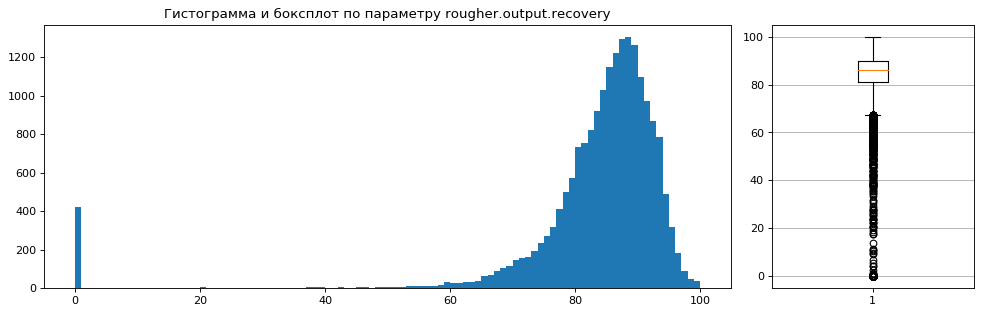

In [103]:
stat_plot(gold_recovery_full.loc[gold_recovery_full['rougher.output.recovery'].notnull()], 'rougher.output.recovery', 100)

In [104]:
gold_recovery_full['rougher.output.recovery'].describe()

count    19597.000000
mean        83.078122
std         14.661880
min          0.000000
25%         80.941306
50%         86.144121
75%         89.987561
max        100.000000
Name: rougher.output.recovery, dtype: float64

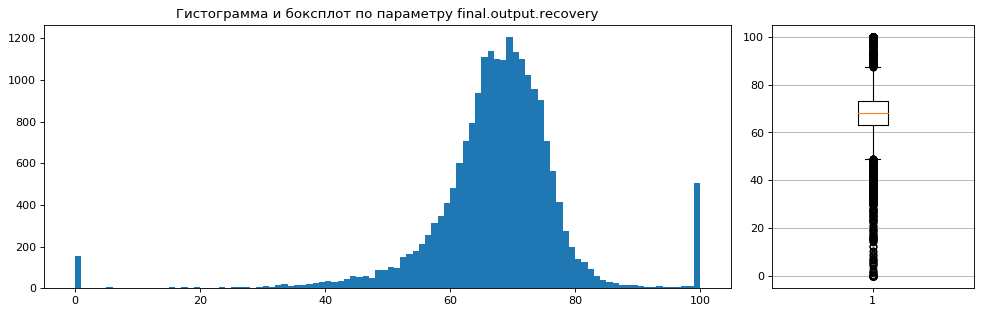

In [105]:
stat_plot(gold_recovery_full.loc[gold_recovery_full['final.output.recovery'].notnull()], 'final.output.recovery', 100)

In [106]:
gold_recovery_full['final.output.recovery'].describe()

count    20753.000000
mean        67.447488
std         11.616034
min          0.000000
25%         63.282393
50%         68.322258
75%         72.950836
max        100.000000
Name: final.output.recovery, dtype: float64

#### Для обоих целевых признаков наблюдается большое количество выбросов. Их необходимо удалить, так как их наличие будет отрицательно сказываться на качестве обучаемой модели

In [107]:
rougher_output_recovery = stat(gold_recovery_full, 'rougher.output.recovery')
len(rougher_output_recovery)

962

In [108]:
final_output_recovery = stat(gold_recovery_full, 'final.output.recovery')
len(final_output_recovery)

1461

In [109]:
gold_recovery_train = gold_recovery_train.drop(gold_recovery_train.loc[gold_recovery_train['date'].isin(rougher_output_recovery.values)].index, axis=0)

In [110]:
gold_recovery_train = gold_recovery_train.drop(gold_recovery_train.loc[gold_recovery_train['date'].isin(final_output_recovery.values)].index, axis=0)

In [111]:
gold_recovery_full = gold_recovery_full.drop(gold_recovery_full.loc[gold_recovery_full['date'].isin(rougher_output_recovery.values)].index, axis=0)

In [112]:
gold_recovery_full = gold_recovery_full.drop(gold_recovery_full.loc[gold_recovery_full['date'].isin(final_output_recovery.values)].index, axis=0)

In [113]:
gold_recovery_test = gold_recovery_test.drop(gold_recovery_test.loc[gold_recovery_test['date'].isin(rougher_output_recovery.values)].index, axis=0)

In [114]:
gold_recovery_test = gold_recovery_test.drop(gold_recovery_test.loc[gold_recovery_test['date'].isin(final_output_recovery.values)].index, axis=0)

# 3. Модель

Для обучения модели преобразуем обучающий и тестовый датасеты:
* В обучающем датасете оставим только фичи, которые есть в тестовом датасете
* В тестовый датасет добавим значения целевых признаков rougher.output.recovery и final.output.recovery  

Также проведем масштабирование признаков.

#### Сформируем тестовую и обучающую выборки, разделим их на фичи и целевые признаки.

Выделяем фичи обучающей выборки

In [115]:
feature_train = gold_recovery_train.loc[:,['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 
                                          'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
                                          'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level',
                                          'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level',
                                          'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level',
                                          'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 
                                          'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate',
                                          'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 
                                          'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate',
                                          'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 
                                          'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 
                                          'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 
                                          'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 
                                          'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 
                                          'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 
                                          'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level',
                                          'secondary_cleaner.state.floatbank2_a_air', 
                                          'secondary_cleaner.state.floatbank2_a_level',
                                          'secondary_cleaner.state.floatbank2_b_air',
                                          'secondary_cleaner.state.floatbank2_b_level',
                                          'secondary_cleaner.state.floatbank3_a_air',
                                          'secondary_cleaner.state.floatbank3_a_level',
                                          'secondary_cleaner.state.floatbank3_b_air',
                                          'secondary_cleaner.state.floatbank3_b_level',
                                          'secondary_cleaner.state.floatbank4_a_air',
                                          'secondary_cleaner.state.floatbank4_a_level',
                                          'secondary_cleaner.state.floatbank4_b_air',
                                          'secondary_cleaner.state.floatbank4_b_level',
                                          'secondary_cleaner.state.floatbank5_a_air',
                                          'secondary_cleaner.state.floatbank5_a_level',
                                          'secondary_cleaner.state.floatbank5_b_air',
                                          'secondary_cleaner.state.floatbank5_b_level',
                                          'secondary_cleaner.state.floatbank6_a_air',
                                          'secondary_cleaner.state.floatbank6_a_level']]

In [116]:
feature_train = feature_train.reset_index()
feature_train = feature_train.drop(['index'], axis=1)

Выделяем целевые признаки для обучающей модели

In [117]:
target_train = gold_recovery_train.loc[:, ['rougher.output.recovery', 'final.output.recovery']]
target_train = target_train.reset_index()
target_train = target_train.drop(['index'], axis=1)

Выделяем фичи тестовой модели

In [118]:
feature_test = gold_recovery_test.reset_index()
feature_test = feature_test.drop(['index'], axis=1)
feature_test = feature_test.drop(['date'], axis=1)

Выделяем целевые признаки для тестовой модели из полного датасета

In [119]:
date = gold_recovery_test['date']

In [120]:
target_test = gold_recovery_full.loc[gold_recovery_full['date'].isin(date.values), ['rougher.output.recovery', 'final.output.recovery']].reset_index()

In [121]:
target_test = target_test.drop(['index'], axis=1)

Проверим отсутствие null-значений в целевых признаках тестовой выборки

In [122]:
target_test.isnull().sum()

rougher.output.recovery    75
final.output.recovery      14
dtype: int64

Удаляем строки с null-значениями из фичей и целевых признаков

In [123]:
feature_test = feature_test.drop(target_test.loc[target_test['rougher.output.recovery'].isnull()].index, axis=0)

In [124]:
target_test = target_test.loc[target_test['rougher.output.recovery'].notnull()]

In [125]:
feature_test = feature_test.drop(target_test.loc[target_test['final.output.recovery'].isnull()].index, axis=0)

In [126]:
target_test = target_test.loc[target_test['final.output.recovery'].notnull()]

#### Масштабируем признаки

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [128]:
numeric = ['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 
          'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
          'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level',
          'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level',
          'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level',
          'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 
          'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate',
          'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 
          'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate',
          'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 
          'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 
          'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 
          'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 
          'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 
          'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 
          'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level',
          'secondary_cleaner.state.floatbank2_a_air', 
          'secondary_cleaner.state.floatbank2_a_level',
          'secondary_cleaner.state.floatbank2_b_air',
          'secondary_cleaner.state.floatbank2_b_level',
          'secondary_cleaner.state.floatbank3_a_air',
          'secondary_cleaner.state.floatbank3_a_level',
          'secondary_cleaner.state.floatbank3_b_air',
          'secondary_cleaner.state.floatbank3_b_level',
          'secondary_cleaner.state.floatbank4_a_air',
          'secondary_cleaner.state.floatbank4_a_level',
          'secondary_cleaner.state.floatbank4_b_air',
          'secondary_cleaner.state.floatbank4_b_level',
          'secondary_cleaner.state.floatbank5_a_air',
          'secondary_cleaner.state.floatbank5_a_level',
          'secondary_cleaner.state.floatbank5_b_air',
          'secondary_cleaner.state.floatbank5_b_level',
          'secondary_cleaner.state.floatbank6_a_air',
          'secondary_cleaner.state.floatbank6_a_level']

scaler = StandardScaler()
# Регион 0
scaler.fit(feature_train[numeric])
feature_train[numeric] = scaler.transform(feature_train[numeric])
feature_test[numeric] = scaler.transform(feature_test[numeric])

#### Напишем функцию для вычисления sMAPE

In [129]:
# Функция расчета sMAPE
def smape(target, predict):
    N = len(target)
    smape = (1/N)*sum(abs(target - predict)/((abs(target)+abs(predict))/2))*100
    return smape

In [130]:
# Функция расчета итогового sMAPE
def final_smape(smape1, smape2):
    final_smape = 0.25*smape1 + 0.75*smape2
    return final_smape

Для расчета скора обученных моделей воспользуемся методом **make_scorer**

In [131]:
scorer = make_scorer(score_func = smape, greater_is_better = True)

#### Проведем кросс-валидацию для различных моделей

**Линейная регрессия**

In [132]:
model_lr = LinearRegression()

Целевой параметр **rougher.output.recovery**

In [133]:
scores_lr_rougher = cross_val_score(model_lr, feature_train, target_train['rougher.output.recovery'], cv=5, scoring=scorer, error_score='raise')
scores_lr_rougher

array([7.86790816, 5.58379843, 4.2777428 , 4.22773039, 6.46718644])

In [134]:
scores_lr_rougher.mean()

5.684873244296514

Целевой параметр **final.output.recovery**

In [135]:
scores_lr_final = cross_val_score(model_lr, feature_train, target_train['final.output.recovery'], cv=5, scoring=scorer)
scores_lr_final

array([8.44060801, 7.17343102, 6.7527188 , 7.30147519, 9.5296295 ])

In [136]:
scores_lr_final.mean()

7.839572504139349

#### Рассчитаем итоговое значение sMAPE

In [137]:
final_smape(scores_lr_rougher.mean(), scores_lr_final.mean())

7.300897689178641

**Случайный лес**

In [138]:
model_rfr = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)

Целевой параметр **rougher.output.recovery**

In [139]:
scores_rfr_rougher = cross_val_score(model_rfr, feature_train, target_train['rougher.output.recovery'], cv=5, scoring=scorer)
scores_rfr_rougher

array([7.2942732 , 4.43895538, 3.69165795, 6.55462213, 6.2726509 ])

In [140]:
scores_rfr_rougher.mean()

5.650431913397548

Целевой параметр **final.output.recovery**

In [141]:
scores_rfr_final = cross_val_score(model_rfr, feature_train, target_train['final.output.recovery'], cv=5, scoring=scorer)
scores_rfr_final

array([6.86238054, 6.27979648, 6.17189616, 6.5251442 , 9.0075861 ])

In [142]:
scores_rfr_final.mean()

6.969360693568069

#### Рассчитаем итоговое значение sMAPE

In [143]:
final_smape(scores_rfr_rougher.mean(), scores_rfr_final.mean())

6.639628498525438

**Дерево решений**

In [144]:
model_dtr = DecisionTreeRegressor(max_depth=20, random_state=42)

Целевой параметр **rougher.output.recovery**

In [145]:
scores_dtr_rougher = cross_val_score(model_dtr, feature_train.loc[target_train['rougher.output.recovery'] != 0], target_train.loc[target_train['rougher.output.recovery']!= 0, 'rougher.output.recovery'], cv=5, scoring=scorer)
scores_dtr_rougher

array([13.57567788,  6.84041709,  5.59838163,  9.16822428,  7.45140927])

In [146]:
scores_dtr_rougher.mean()

8.526822029341066

Целевой параметр **final.output.recovery**

In [147]:
scores_dtr_final = cross_val_score(model_dtr, feature_train.loc[target_train['final.output.recovery'] != 0], target_train.loc[target_train['final.output.recovery']!= 0, 'final.output.recovery'], cv=5, scoring=scorer)
scores_dtr_final

array([11.69099953,  9.62172525,  8.6985413 ,  9.54078887, 12.23119703])

In [148]:
scores_dtr_final.mean()

10.356650395553054

#### Рассчитаем итоговое значение sMAPE

In [149]:
final_smape(scores_dtr_rougher.mean(), scores_dtr_final.mean())

9.899193304000057

#### Лучшее итоговое sMAPE показала модель случайного леса. Обучим модель и рассчитаем итоговый sMAPE для тестовой модели. Для оценки адекватности модели сравним итоговый sMAPE с константной моделью, предсказывающей среднее значение целевых параметров.

Обучим модель для целевого признака **rougher.output.recovery**

In [150]:
model_rfr_rougher = RandomForestRegressor(n_estimators=100,  random_state=42)
model_rfr_rougher.fit(feature_train, target_train['rougher.output.recovery'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Обучим модель для целевого признака **rougher.output.recovery**

In [151]:
model_rfr_final = RandomForestRegressor(n_estimators=100, random_state=42)
model_rfr_final.fit(feature_train, target_train['final.output.recovery'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Получим предсказания для тестового датасета

In [152]:
predict_rougher = model_rfr_rougher.predict(feature_test)

In [153]:
predict_final = model_rfr_final.predict(feature_test)

#### Расчитаем sMAPE и итоговый sMAPE для целевых параметров

In [154]:
smape_rougher = smape(target_test['rougher.output.recovery'], predict_rougher)
smape_rougher

3.7816456055783307

In [155]:
smape_final = smape(target_test['final.output.recovery'], predict_final)
smape_final

6.7153135189642725

#### Итоговый sMAPE

In [156]:
final_smape(smape_rougher, smape_final)

5.981896540617787

#### Рассчитаем sMAPE для константной модели

В качестве предсказаний будем использовать средние значения целевых параметров для тестового набора

In [157]:
mean_rougher = pd.Series(target_train['rougher.output.recovery'].mean(), index=target_test.index)

In [158]:
mean_final = pd.Series(target_train['final.output.recovery'].mean(), index=target_test.index)

#### Расчитаем sMAPE и итоговый sMAPE для целевых параметров

In [159]:
smape_rougher = smape(target_test['rougher.output.recovery'], mean_rougher)
smape_rougher

4.312919863271603

In [160]:
smape_final = smape(target_test['final.output.recovery'], mean_final)
smape_final

6.991805462211537

#### Итоговый sMAPE

In [161]:
final_smape(smape_rougher, smape_final)

6.322084062476553

#### Обученная модель случайного леса показала лучший результат, чем константная модель. Результат модели случайного леса итоговый sMAPE равный 5.98, у константной модели итоговый sMAPE равен 6.32.

### Обученная модель случайного леса может быть использована для предстказаний коэффициента восстановления золота из золотосодержащей руды.